In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting output format
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [2]:
%%time
df = pd.read_csv('/Users/shih-tien/SW_PRO/Personal Projects/AWS_EMR/Dataset/US_Accidents_June20.csv')
df_original = df.copy()
df.head(3)

CPU times: user 29.7 s, sys: 12.3 s, total: 42 s
Wall time: 1min 1s


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [4]:
df.describe(include='all')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,3513617,3513617,2.478818e+06,3.513617e+06,3513617,3513617,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,3513616,1.250753e+06,3513617,3513617,3513505,3513617,3513617,3512548,3513617,3509737,3506859,3470294,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3454743,3.059008e+06,1.487743e+06,3437479,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513502,3513502,3513502,3513502
unique,3513617,3,NaN,NaN,3200042,3246120,NaN,NaN,NaN,NaN,NaN,1780092,NaN,176262,3,11895,1724,49,418780,1,4,2001,546086,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,127,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,A-1476855,MapQuest,NaN,NaN,2017-05-15 09:22:55,2017-05-15 15:22:55,NaN,NaN,NaN,NaN,NaN,At I-15 - Accident.,NaN,I-5 N,R,Houston,Los Angeles,CA,91706,US,US/Eastern,KMCJ,2019-09-24 07:53:00,NaN,NaN,NaN,NaN,NaN,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,2414301,NaN,NaN,74,73,NaN,NaN,NaN,NaN,NaN,2123,NaN,41264,2879797,101240,271627,816825,5621,3513617,1484854,61273,267,NaN,NaN,NaN,NaN,NaN,368282,NaN,NaN,808202,3471535,3513011,3239091,3504053,3229168,3509233,3482442,3513433,3443296,3461641,3512216,2889994,3513617,2593757,2767921,2943398,3075001
mean,NaN,NaN,2.080226e+02,2.339929e+00,NaN,NaN,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,NaN,5.975383e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,NaN,8.219025e+00,1.598256e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.076627e+01,5.521935e-01,NaN,NaN,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,NaN,1.496624e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,NaN,5.262847e+00,1.928262e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.000000e+02,1.000000e+00,NaN,NaN,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.010000e+02,2.000000e+00,NaN,NaN,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,NaN,8.640000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,NaN,5.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.010000e+02,2.000000e+00,NaN,NaN,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,NaN,2.798000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,NaN,7.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.010000e+02,3.000000e+00,NaN,NaN,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,NaN,7.098000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,NaN,1.150000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

## Data Preprocessing

In [6]:
# Extract year, month, day, hour, weekday, and accident duration

# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
df['Time_Duration(min)']=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [7]:
# Deal with outliers

# 1. Drop rows with negative time_dutaion
# Check if there is any negative time_duration values
td_drop_index = df['Time_Duration(min)'][df['Time_Duration(min)']<=0].index
# Then drop TD < 0 rows
df.drop(td_drop_index, inplace=True)

# 2. Fill outliers with median values
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median
n=3
median = df['Time_Duration(min)'].median()
std = df['Time_Duration(min)'].std()
outliers = (df['Time_Duration(min)'] - median).abs() > std*n
# Set outliers to NAN
df[outliers] = np.nan
# Fill NAN with median
df['Time_Duration(min)'].fillna(median, inplace=True)


In [8]:
print('Max time to clear an accident: {} minutes or {} hours or {} days\nMin time to clear an accident: {} minutes.'.format(df['Time_Duration(min)'].max(),round(df['Time_Duration(min)'].max()/60), round(df['Time_Duration(min)'].max()/60/24), df['Time_Duration(min)'].min()))

Max time to clear an accident: 10140.0 minutes or 169 hours or 7 days
Min time to clear an accident: 1.0 minutes.


## Features Selection

In [9]:
# Set the list of features to include in Machine Learning
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat',
             'Distance(mi)','Side','City','County','State','Timezone',
             'Temperature(F)','Humidity(%)','Pressure(in)',
             'Visibility(mi)','Wind_Direction','Weather_Condition',
             'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit',
             'Railway','Roundabout','Station','Stop','Traffic_Calming',
             'Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday',
             'Time_Duration(min)']

In [10]:
# Select the dataset to include only the selected features
df_model=df[feature_lst].copy()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513595 entries, 0 to 3513616
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   TMC                 float64
 2   Severity            float64
 3   Start_Lng           float64
 4   Start_Lat           float64
 5   Distance(mi)        float64
 6   Side                object 
 7   City                object 
 8   County              object 
 9   State               object 
 10  Timezone            object 
 11  Temperature(F)      float64
 12  Humidity(%)         float64
 13  Pressure(in)        float64
 14  Visibility(mi)      float64
 15  Wind_Direction      object 
 16  Weather_Condition   object 
 17  Amenity             float64
 18  Bump                float64
 19  Crossing            float64
 20  Give_Way            float64
 21  Junction            float64
 22  No_Exit             float64
 23  Railway             float64
 24  Roundabout          floa

In [11]:
# Drop rows with missing values

# Check missing values
df_model.isnull().mean()

Source                0.000194
TMC                   0.294525
Severity              0.000194
Start_Lng             0.000194
Start_Lat             0.000194
Distance(mi)          0.000194
Side                  0.000194
City                  0.000225
County                0.000194
State                 0.000194
Timezone              0.001298
Temperature(F)        0.018894
Humidity(%)           0.020019
Pressure(in)          0.016092
Visibility(mi)        0.021775
Wind_Direction        0.016945
Weather_Condition     0.021855
Amenity               0.000194
Bump                  0.000194
Crossing              0.000194
Give_Way              0.000194
Junction              0.000194
No_Exit               0.000194
Railway               0.000194
Roundabout            0.000194
Station               0.000194
Stop                  0.000194
Traffic_Calming       0.000194
Traffic_Signal        0.000194
Turning_Loop          0.000194
Sunrise_Sunset        0.000226
Hour                  0.000194
Weekday 

In [12]:
df_model.dropna(subset=df_model.columns[df_model.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_model.shape

(2408025, 34)

In [13]:
df_model['Timezone'].value_counts()

US/Eastern     1099785
US/Central      643067
US/Pacific      545007
US/Mountain     120166
Name: Timezone, dtype: int64

In [14]:
df_model['Timezone'] = df_model['Timezone'].str[:2] + df_model['Timezone'].str[3:]

## Extract Partial dataset for modeling - Due to personal laptop computing limitation.

In [15]:
# Set state
state='TX'

# Select the state of Pennsylvania
df_state=df_model.loc[df_model.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274228 entries, 261007 to 2478393
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Source              274228 non-null  object 
 1   TMC                 274228 non-null  float64
 2   Severity            274228 non-null  float64
 3   Start_Lng           274228 non-null  float64
 4   Start_Lat           274228 non-null  float64
 5   Distance(mi)        274228 non-null  float64
 6   Side                274228 non-null  object 
 7   City                274228 non-null  object 
 8   County              274228 non-null  object 
 9   Timezone            274228 non-null  object 
 10  Temperature(F)      274228 non-null  float64
 11  Humidity(%)         274228 non-null  float64
 12  Pressure(in)        274228 non-null  float64
 13  Visibility(mi)      274228 non-null  float64
 14  Wind_Direction      274228 non-null  object 
 15  Weather_Condition   274228 n

In [16]:
df_state.shape

(274228, 33)

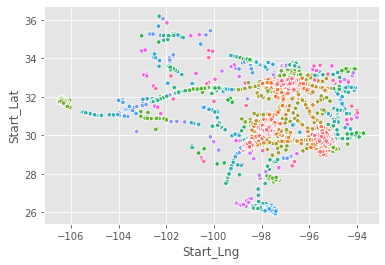

In [17]:
# Map of accidents, color code by county

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [18]:
df_state['County'].unique()

array(['Travis', 'Dallas', 'Harris', 'Tarrant', 'Bexar', 'Hays', 'Ellis',
       'Brazoria', 'Williamson', 'Montgomery', 'Comal', 'Kaufman', 'Bell',
       'Hill', 'McLennan', 'Parker', 'Fort Bend', 'Johnson', 'Rockwall',
       'Waller', 'Madison', 'Fayette', 'Bastrop', 'Leon', 'Colorado',
       'Smith', 'Blanco', 'Guadalupe', 'Falls', 'Navarro', 'Wood',
       'Burnet', 'Hood', 'Caldwell', 'Brazos', 'Freestone', 'Walker',
       'Austin', 'Van Zandt', 'Erath', 'Henderson', 'Grimes', 'Mclennan',
       'Anderson', 'Gonzales', 'DeWitt', 'Hunt', 'Robertson', 'Lampasas',
       'Bosque', 'Wharton', 'Eastland', 'Milam', 'Houston', 'Palo Pinto',
       'Limestone', 'Lee', 'Llano', 'Cherokee', 'Lavaca', 'Somervell',
       'Galveston', 'El Paso', 'Denton', 'Collin', 'Pecos', 'Nueces',
       'Nolan', 'Mitchell', 'Bowie', 'Kinney', 'Orange', 'Coleman',
       'Wichita', 'Deaf Smith', 'Dimmit', 'Gregg', 'Taylor', 'Jefferson',
       'Gillespie', 'Lubbock', 'Midland', 'San Jacinto', 'Chambers

In [19]:
# Set county
county='Dallas'

# Select the state of Pennsylvania
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60307 entries, 261012 to 2478067
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              60307 non-null  object 
 1   TMC                 60307 non-null  float64
 2   Severity            60307 non-null  float64
 3   Start_Lng           60307 non-null  float64
 4   Start_Lat           60307 non-null  float64
 5   Distance(mi)        60307 non-null  float64
 6   Side                60307 non-null  object 
 7   City                60307 non-null  object 
 8   Timezone            60307 non-null  object 
 9   Temperature(F)      60307 non-null  float64
 10  Humidity(%)         60307 non-null  float64
 11  Pressure(in)        60307 non-null  float64
 12  Visibility(mi)      60307 non-null  float64
 13  Wind_Direction      60307 non-null  object 
 14  Weather_Condition   60307 non-null  object 
 15  Amenity             60307 non-null  float64
 1

In [20]:
# Output dataset and upload to AWS S3 bucket for PySpark computation!
df_county.to_csv('./US_Accidents_county_clean_data.csv',index=False)

# state granularity
df_state.to_csv('./US_Accidents_state_clean_data.csv',index=False)

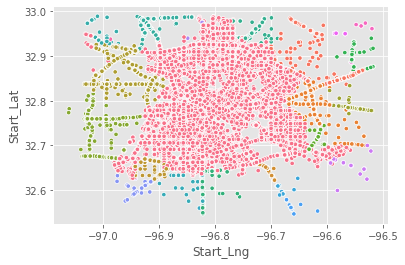

In [21]:
# Map of accidents, color code by city

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=20)
plt.show()

In [22]:
df_county.shape

(60307, 32)

## Deal with categorical data: pd.get_dummies()

In [23]:
# Generate dummies for categorical data
df_county_dummy = pd.get_dummies(df_county,drop_first=True)
df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60307 entries, 261012 to 2478067
Columns: 132 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(108)
memory usage: 17.7 MB


In [24]:
df_county_dummy.shape

(60307, 132)

In [25]:
df_county_dummy.head(3)

,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour,Time_Duration(min),Source_MapQuest-Bing,Side_R,City_Balch Springs,City_Carrollton,City_Cedar Hill,City_Coppell,City_Dallas,City_Desoto,City_Duncanville,City_Ferris,City_Garland,City_Grand Prairie,City_Hutchins,City_Irving,City_Lancaster,City_Mesquite,City_Northeast Dallas,City_Red Oak,City_Richardson,City_Rowlett,City_Sachse,City_Seagoville,City_Southwest Dallas,City_Sunnyvale,City_Wilmer,City_Wylie,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Rain Showers,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Fog,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Haze,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Snow Grains,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Thunderstorms and Snow,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Sunrise_Sunset_Night,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
261012,201.0,2.0,-96.943153,32.662193,0.01,60.1,24.0,30.00,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,75.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
261013,201.0,3.0,-96.782021,32.778790,0.01,61.0,22.0,30.01,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,78.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
261014,201.0,2.0,-96.762245,32.724277,0.00,61.0,22.0,30.01,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,76.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## State Granularity

In [26]:
# Generate dummies for categorical data
df_state_dummy = pd.get_dummies(df_state,drop_first=True)
df_state_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274228 entries, 261007 to 2478393
Columns: 990 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(966)
memory usage: 304.9 MB


In [27]:
df_state_dummy.shape

(274228, 990)

## Model Training

In [28]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [29]:
# Assign the data

# County Granularity
#df=df_county_dummy

# State Granularity
df=df_state_dummy

# Set the target for the prediction
target='Severity'

# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [30]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274228 entries, 261007 to 2478393
Data columns (total 990 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   TMC                                                    float64
 1   Severity                                               float64
 2   Start_Lng                                              float64
 3   Start_Lat                                              float64
 4   Distance(mi)                                           float64
 5   Temperature(F)                                         float64
 6   Humidity(%)                                            float64
 7   Pressure(in)                                           float64
 8   Visibility(mi)                                         float64
 9   Amenity                                                float64
 10  Bump                                                   float6

In [31]:
df.head(3)

,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour,Time_Duration(min),Source_MapQuest-Bing,Side_R,City_Abernathy,City_Abilene,City_Addison,City_Adkins,City_Adrian,City_Alamo,City_Alba,City_Aledo,City_Alice,City_Allen,City_Alleyton,City_Alton,City_Alvarado,City_Alvin,City_Amarillo,City_Amherst,City_Anahuac,City_Andrews,City_Angleton,City_Anna,City_Argyle,City_Arlington,City_Atascosa,City_Athens,City_Atlanta,City_Aubrey,City_Austin,City_Avinger,City_Azle,City_Bacliff,City_Baird,City_Balch Springs,City_Ballinger,City_Balmorhea,City_Bandera,City_Barstow,City_Bartlett,City_Bastrop,City_Baytown,City_Beasley,City_Beaumont,City_Beckville,City_Bedford,City_Bedias,City_Bee Cave,City_Beeville,City_Bellaire,City_Bellevue,City_Bells,City_Belton,City_Benbrook,City_Bertram,City_Big Spring,City_Big Wells,City_Bishop,City_Blanco,City_Bluff Dale,City_Bluffton,City_Boerne,City_Boling,City_Bowie,City_Brackettville,City_Brazoria,City_Bremond,City_Brenham,City_Bridge City,City_Briggs,City_Brookeland,City_Brookshire,City_Brownsville,City_Bruceville,City_Bryan,City_Buckholts,City_Buda,...,County_Wise,County_Wood,County_Yoakum,County_Young,Timezone_USMountain,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Blowing Dust / Windy,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Drizzle and Fog,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Rain Showers,Weather_Condition_Heavy Snow,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Heavy Thunderstorms with Small Hail,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Fog,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Haze,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Snow / Windy,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Shower,Weather_Condition_Rain Showers,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Snow Grains,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Thunderstorms and Snow,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Sunrise_Sunset_Night,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_

In [32]:
# List of classification algorithms
model_lst=['Logistic Regression', 'Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

#### Logistic Regression

In [33]:
%%time
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Logistic regression algorithm] accuracy_score: 0.799.
CPU times: user 2min 8s, sys: 5.92 s, total: 2min 13s
Wall time: 1min 23s


#### Random Forest

In [34]:
%%time
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.872.
CPU times: user 2min 44s, sys: 5.27 s, total: 2min 49s
Wall time: 3min 5s


No handles with labels found to put in legend.


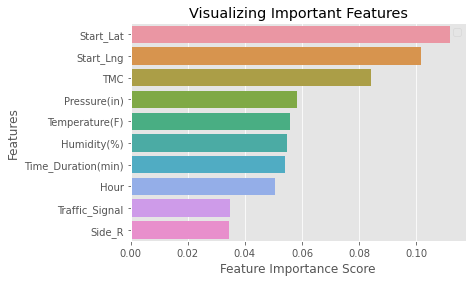

In [35]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:k], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

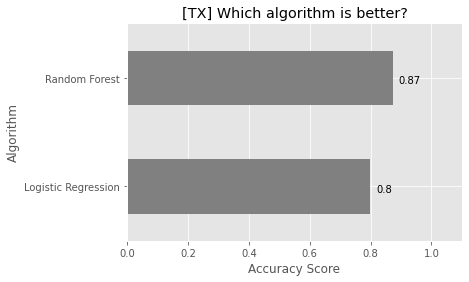

In [36]:

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(model_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(model_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}] Which algorithm is better?'.format(state))

plt.show()

## References
[Analysis](https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont)\
[XGBoost](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d#:~:text=XGBoost%20is%20a%20decision%2Dtree,all%20other%20algorithms%20or%20frameworks)\
[XGBoost - easy](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)